In [1]:
%matplotlib notebook

# general tools
import numpy as np
import pandas as pd
from numpy import random
import scipy as sp

# dimensionality reduction and visualization
import anndata as ad
from scanpy.api.tl import diffmap
import matplotlib.pyplot as plt
import matplotlib as mpl

import newick

/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import sys
sys.path.append("/home/npapado/Documents/repos/prosstt/prosstt/")

In [3]:
%load_ext autoreload
%autoreload 2
import simulation as sim
import tree as tree
import tree_utils as tu

In [4]:
random.seed(42)

In [5]:
newick1 = "(A,B)C;"
G = 500
t = tree.Tree.from_newick(newick1, genes=G)
sample_time = np.arange(0, t.get_max_time())
gene_scale = np.exp(sp.stats.norm.rvs(loc=0.8, scale=1, size=t.G))

In [6]:
t.topology

[['C', 'A'], ['C', 'B']]

In [7]:
alpha = np.exp(random.normal(loc=np.log(0.2), scale=np.log(1.5), size=t.G))
beta = np.exp(random.normal(loc=np.log(1), scale=np.log(1.5), size=t.G)) + 1

In [8]:
Ms = {}
while not sim.are_lengths_ok(Ms):
    uMs, Ws, Hs = sim.simulate_branching_data(t, a=0.05)
    for i in t.branches:
        Ms[i] = np.exp(uMs[i]) * gene_scale

t.add_genes(Ms)

/home/npapado/Documents/repos/prosstt/prosstt/simulation.py:367: UserWarning: No argument 'a' specified in kwargs: using gamma and a=0.05
  warnings.warn( "No argument 'a' specified in kwargs: using gamma and a=0.05", UserWarning)
/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [87]:
X, labs, brns, scalings = sim.restricted_simulation(t)

# normalize gene expression by library size
X = (X.transpose() / scalings).transpose()

/home/npapado/Documents/repos/prosstt/prosstt/simulation.py:367: UserWarning: No argument 'a' specified in kwargs: using gamma and a=0.05
  warnings.warn( "No argument 'a' specified in kwargs: using gamma and a=0.05", UserWarning)
/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 98.8% 

<IPython.core.display.Javascript object>


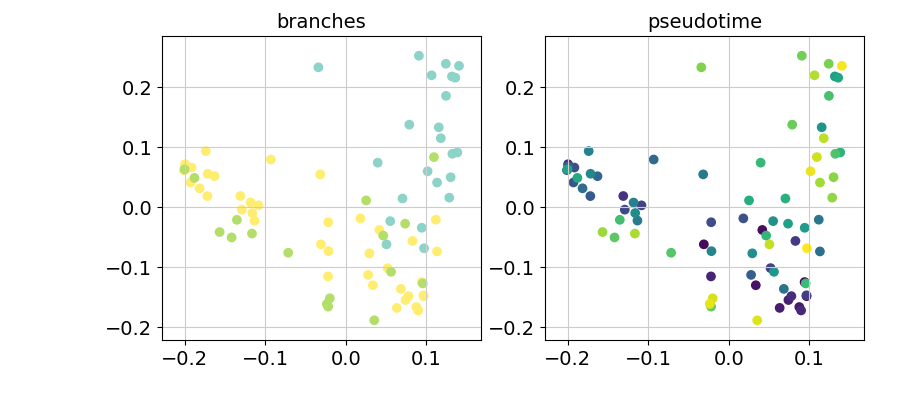

Text(0.5,1,'pseudotime')

In [88]:
data = ad.AnnData(X)
diffmap(adata=data)
dm = data.obsm["X_diffmap"]

br_names, indices = np.unique(brns, return_inverse=True)

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(w=9, h=4)
ax[0].scatter(dm[:, 0], dm[:, 1], c=indices, cmap="Set3")
ax[0].set_title("branches")
# mpl.rcParams['image.cmap'] = 'viridis'
ax[1].scatter(dm[:, 0], dm[:, 1], c=labs, cmap="viridis")
ax[1].set_title("pseudotime")